# Football Dataset of Countries

# Team Members

## Abstract

## Introduction

## Import the data

In [1]:
from pandas import Series
import warnings 
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

In [2]:
series=[]
series.append(Series.from_csv("Argentina.csv",header=0))
series.append(Series.from_csv("Belgium.csv",header=0))
series.append(Series.from_csv("Brazil.csv",header=0))
series.append(Series.from_csv("Germany.csv",header=0))
series.append(Series.from_csv("France.csv",header=0))
series.append(Series.from_csv("Spain.csv",header=0))
series.append(Series.from_csv("Portugal.csv",header=0))
series.append(Series.from_csv("Netherlands.csv",header=0))

## Plot the data

Text(0,0.5,'Rank')

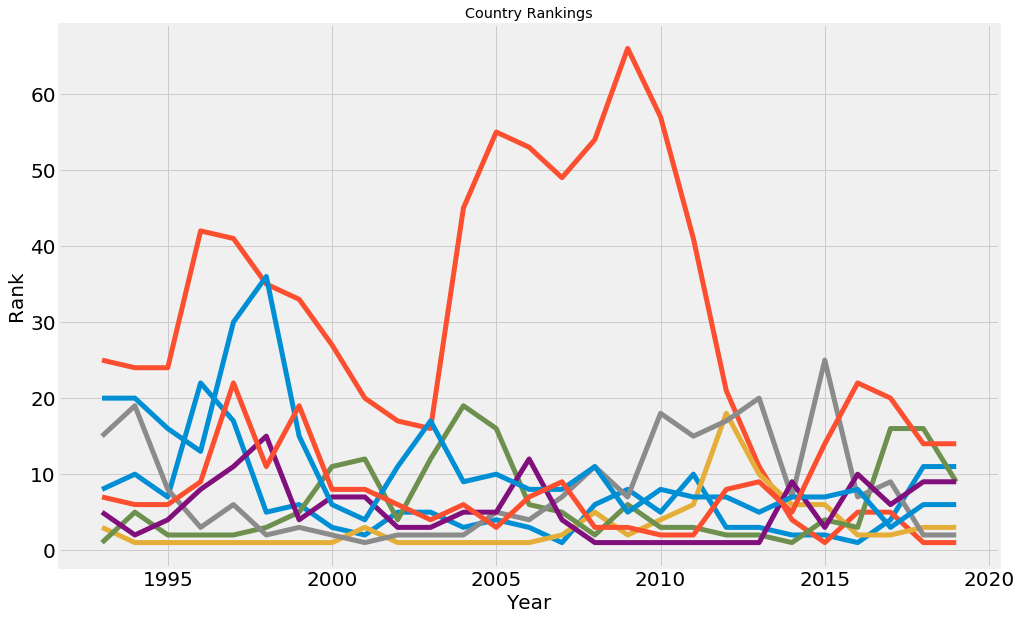

In [3]:
for country_data in series:
    country_data.plot(linewidth=5,fontsize=20,figsize=(15,10),title='Country Rankings',label='True')
plt.xlabel('Year',fontsize=20)
plt.ylabel('Rank',fontsize=20)

## Decompose the data

In [4]:
result=[]
trend=[]
residuals=[]
observed=[]
seasonality=[]

for country_data in series:
    result.append(seasonal_decompose(country_data,model='additive'))
    
n=len(result)
for i in range(0,8):
    trend.append(result[i].trend)
    seasonality.append(result[i].seasonal)
    residuals.append(result[i].resid)
    observed.append(result[i].observed)

## Country's trend

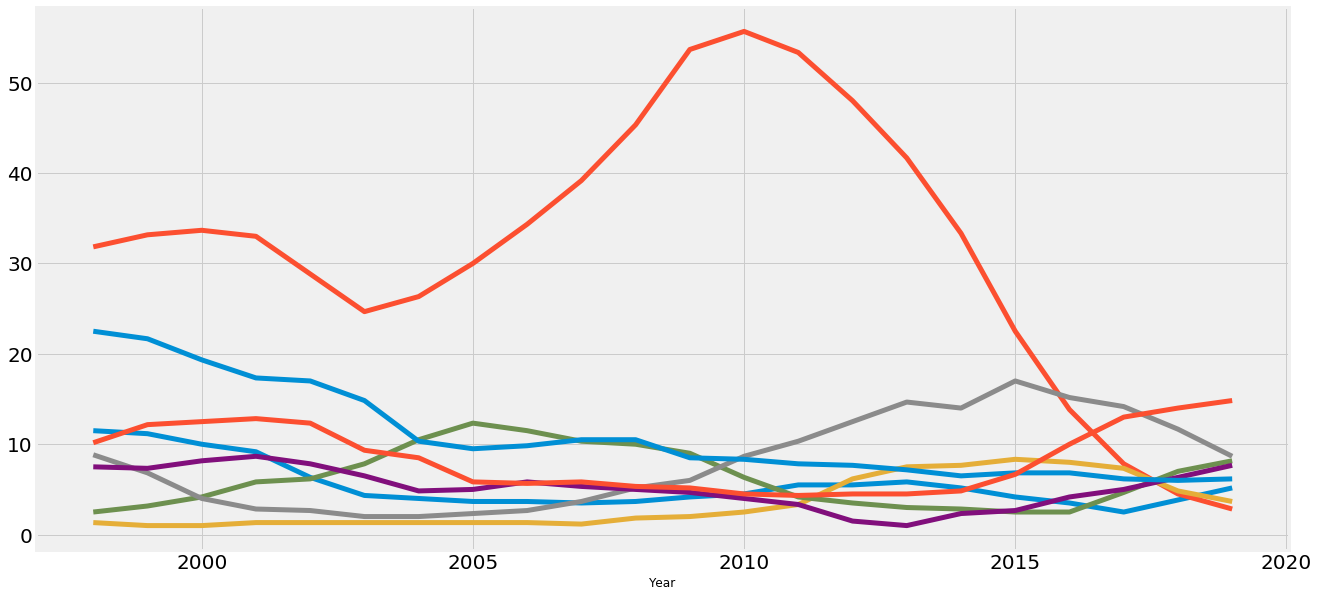

In [5]:
for i in range(0,8):
    series[i].rolling(6).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)#trend


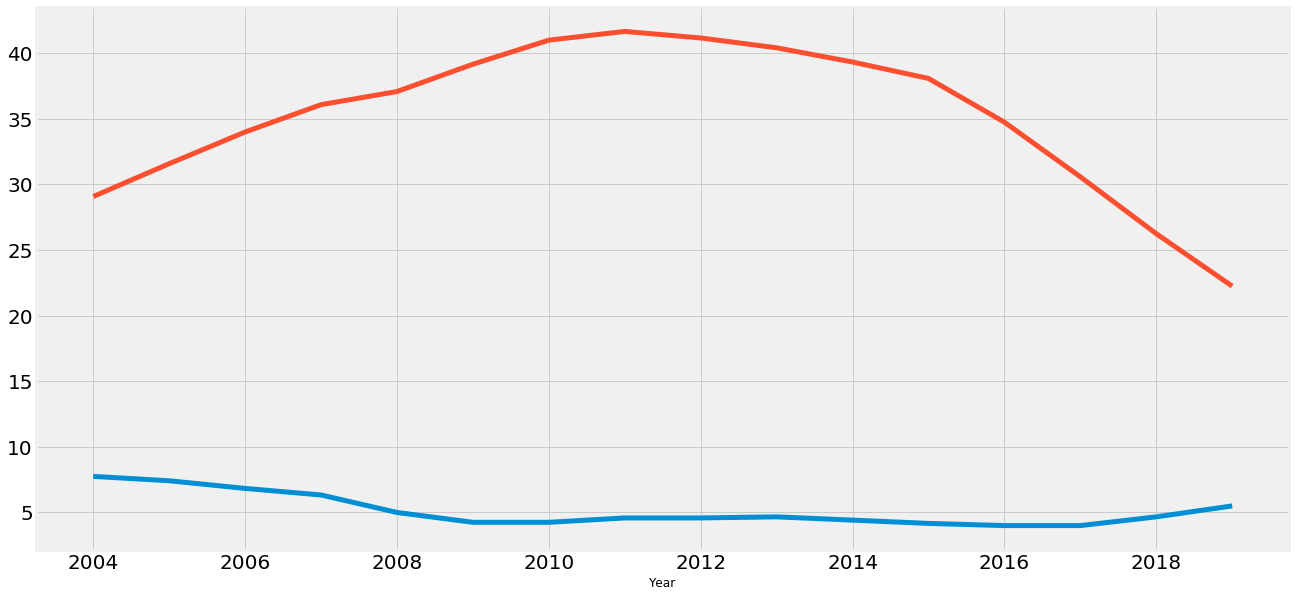

In [6]:
series[0].rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
series[1].rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)

## Country's Seasonality

Text(0.5,0,'Year')

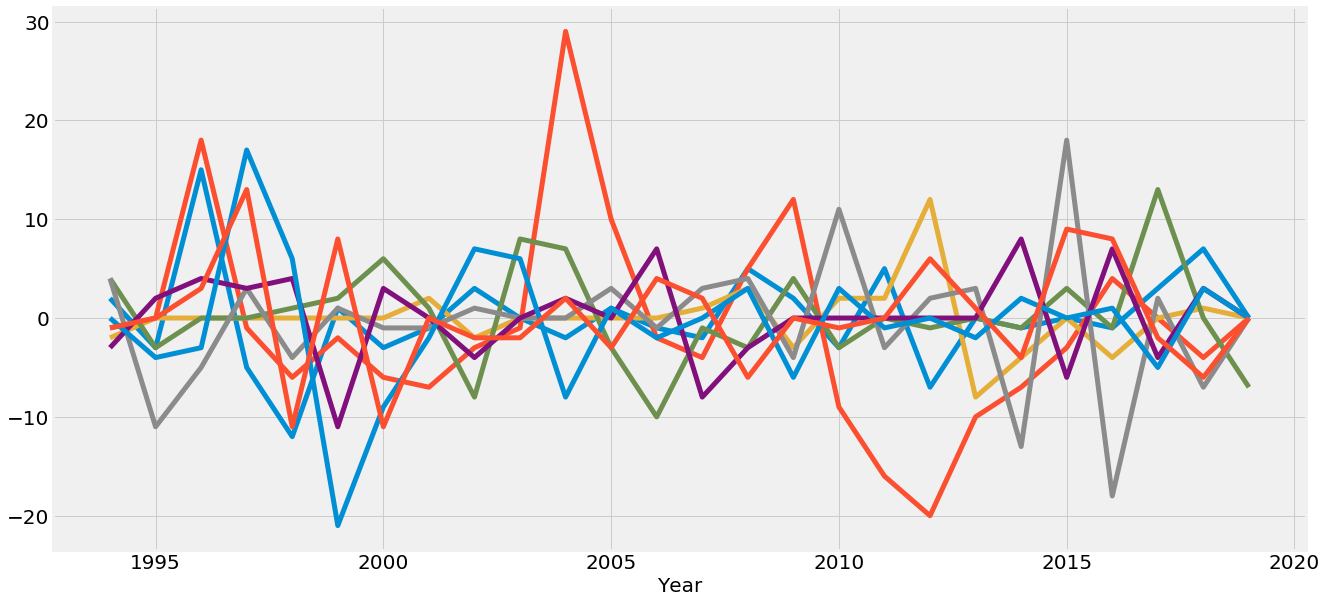

In [7]:
for i in range(0,8):
    series[i].diff().plot(figsize=(20,10), linewidth=5, fontsize=20)#seasonality
plt.xlabel('Year',fontsize=20)

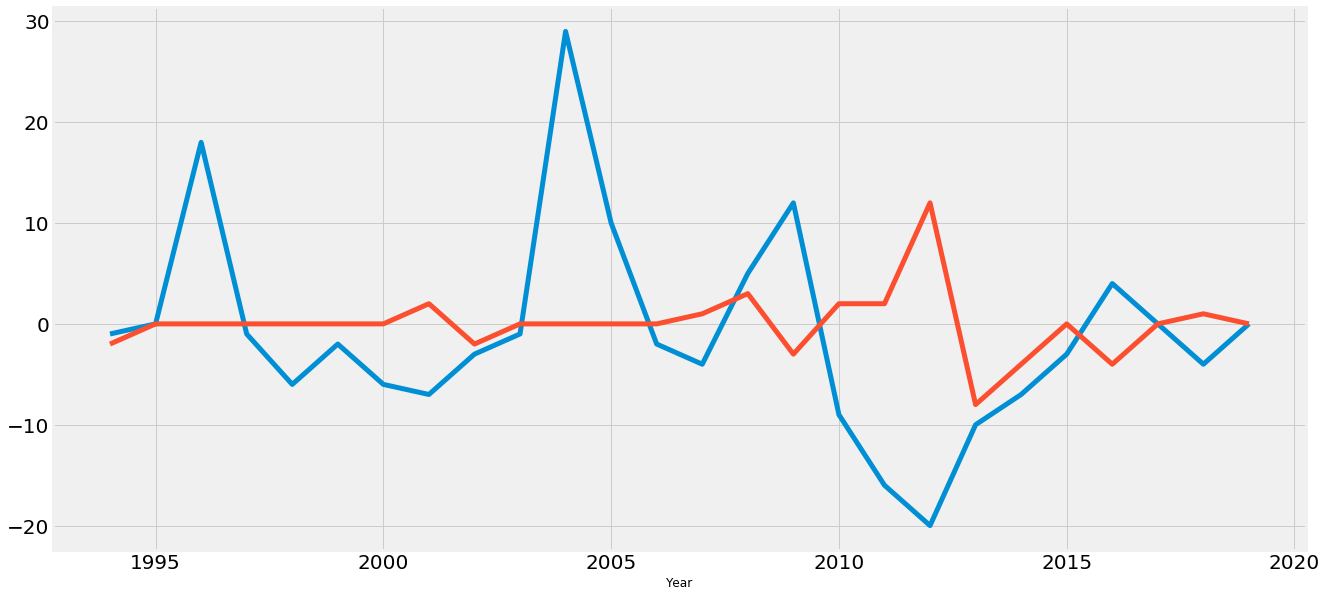

In [8]:
series[1].diff().plot(figsize=(20,10), linewidth=5, fontsize=20)#seasonality_Belgium
series[2].diff().plot(figsize=(20,10), linewidth=5, fontsize=20)#seasonality_Brazil

## Find ARIMA parameters

In [9]:
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

In [10]:
p=1
min=evaluate_arima_model(series[0],(1,0,0))
for i in range(1,5):
    if(min>evaluate_arima_model(series[0],(i,0,0))):
        p=i
        break
print(p)

1


In [11]:
evaluate_arima_model(series[0],(1,1,0))

14.431384640078036

In [12]:
model=[]
model_fit=[]
model_fit2=[]
residuals=[]
forecast=[]
forecast2=[]

for i in range(0,8):
    model.append(ARIMA(series[i],order=(1,1,0)))#best-parameters
    
for i in range(0,8):    
    model_fit.append(model[i].fit(disp=0))

for i in range(0,8):
    residuals.append(model_fit[i].resid)

for i in range(0,8):
    forecast.append(model_fit[i].forecast()[0])


/home/linuxbox/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/home/linuxbox/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/home/linuxbox/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/home/linuxbox/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/home/linuxbox/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 

In [13]:
model_fit[0].summary()#Argentina

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Argentina   No. Observations:                   26
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -77.383
Method:                       css-mle   S.D. of innovations              4.743
Date:                Sun, 21 Apr 2019   AIC                            160.766
Time:                        23:11:04   BIC                            164.540
Sample:                    01-01-1994   HQIC                           161.853
                         - 01-01-2019                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1043      0.786      0.133      0.895      -1.436       1.644
ar.L1.D.Argentina    -0.1912      0.189     -1.012      0.322      -0.562       0.179
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -5.2303           +0.0000j            5.2303            0.5000
-----------------------------------------------------------------------------
"""

## Country with best ranking

In [14]:
min=forecast[0]
for i in range(0,8):
    if(min>forecast[i]):
        country=series[i]
        min=forecast[i]
        val=i

In [15]:
country

Year
1993-01-01    25
1994-01-01    24
1995-01-01    24
1996-01-01    42
1997-01-01    41
1998-01-01    35
1999-01-01    33
2000-01-01    27
2001-01-01    20
2002-01-01    17
2003-01-01    16
2004-01-01    45
2005-01-01    55
2006-01-01    53
2007-01-01    49
2008-01-01    54
2009-01-01    66
2010-01-01    57
2011-01-01    41
2012-01-01    21
2013-01-01    11
2014-01-01     4
2015-01-01     1
2016-01-01     5
2017-01-01     5
2018-01-01     1
2019-01-01     1
Name: Belgium, dtype: int64

In [16]:
model_fit[val].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.Belgium   No. Observations:                   26
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -94.131
Method:                       css-mle   S.D. of innovations              9.012
Date:                Sun, 21 Apr 2019   AIC                            194.263
Time:                        23:11:04   BIC                            198.037
Sample:                    01-01-1994   HQIC                           195.350
                         - 01-01-2019                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.9041      2.779     -0.325      0.748      -6.351       4.542
ar.L1.D.Belgium     0.3784      0.176      2.149      0.042       0.033       0.723
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.6428           +0.0000j            2.6428            0.0000
-----------------------------------------------------------------------------
"""

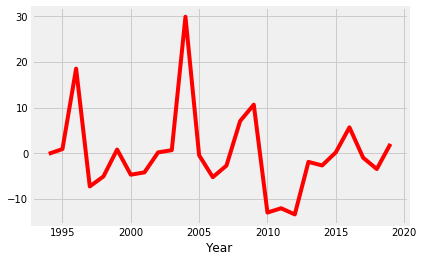

In [17]:
residuals[val].plot(color='r')

## Conclusion